Тема “Обучение без учителя”
Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()
data = boston["data"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
target = boston["target"]

Y = pd.DataFrame(target, columns=["price"])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

/Users/eminov/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


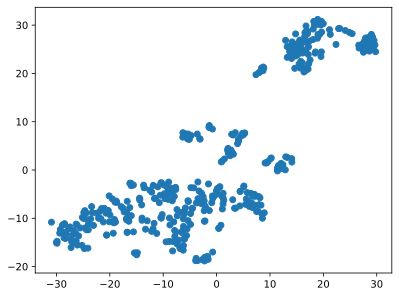

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2

In [17]:
from sklearn.cluster import KMeans

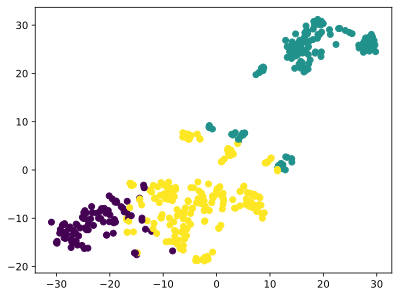

In [18]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [19]:
print('ПЕРВЫЙ КЛАСТЕР: ', Y_train[labels_train == 0].mean())
print('ВТОРОЙ КЛАСТЕР:', Y_train[labels_train == 1].mean())
print('ТРЕТИЙ КЛАСТЕР:', Y_train[labels_train == 2].mean())

Первый кластер:  price    27.788372
dtype: float64
Второй кластер: price    16.165354
dtype: float64
Третий кластер: price    24.958115
dtype: float64


In [20]:
print('ПЕРВЫЙ КЛАСТЕР: ', X_train['CRIM'][labels_train == 0].mean())
print('ВТОРОЙ КЛАСТЕР:', X_train['CRIM'][labels_train == 1].mean())
print('ТРЕТИЙ КЛАСТЕР:', X_train['CRIM'][labels_train == 2].mean())

ПЕРВЫЙ КЛАСТЕР:  0.07356558139534886
ВТОРОЙ КЛАСТЕР: 10.797028425196853
ТРЕТИЙ КЛАСТЕР: 0.42166020942408367
